In [1]:
# Importing labraries
import numpy as np
import pandas as pd 
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import PIL

In [2]:
path = './flowers/'
cate = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
X = []
Y = []

In [4]:
# Read Images
size = 100
for file in cate:
    link = os.path.join(path, file)
    for img in os.listdir(link):
        image = cv2.imread(os.path.join(link, img), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (size, size))
        X.append(np.array(image))
        Y.append(str(file))

In [5]:
X = np.array(X)

In [6]:
X.shape

(4323, 100, 100)

In [7]:
X.shape[0]

4323

In [8]:
X.max()

255

In [9]:
# Visualization
cv2.imshow('Image', X[2500])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
X[0].shape

(100, 100)

In [11]:
# Normalization
X = X.reshape(4323, 100*100)
X = X.astype('float32')/255


In [12]:
X[0]

array([0.5372549 , 0.57254905, 0.58431375, ..., 0.5137255 , 0.5019608 ,
       0.49803922], dtype=float32)

In [13]:
X.shape[0]

4323

In [14]:
Y = np.array(Y)

In [15]:
Y.shape

(4323,)

In [16]:
Label = pd.Series(Y, index=range(0, 4323))

In [17]:
Label

0       daisy
1       daisy
2       daisy
3       daisy
4       daisy
        ...  
4318    tulip
4319    tulip
4320    tulip
4321    tulip
4322    tulip
Length: 4323, dtype: object

In [18]:
Label.value_counts()

dandelion    1052
tulip         984
rose          784
daisy         769
sunflower     734
dtype: int64

In [19]:
# One-hot encoding
# here we will replace daisy = 0, dandelion=1, rose=2, sunflower=3, tulip=4
replace_values = {'daisy':0, 'dandelion':1, 'rose':2, 'sunflower':3, 'tulip':4}

In [20]:
Label = Label.replace(replace_values)

In [21]:
Label

0       0
1       0
2       0
3       0
4       0
       ..
4318    4
4319    4
4320    4
4321    4
4322    4
Length: 4323, dtype: int64

In [22]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Label, test_size=0.3, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [23]:
X_train.shape

(2420, 10000)

In [24]:
Y_train.shape

(2420,)

In [25]:
# let's build the model
network = Sequential()

In [26]:
network.add(layers.Dense(700, activation='relu', input_shape=(X_train.shape[1],)))
network.add(layers.Dense(400, activation='relu'))
# network.add(layers.Dense(200, activation='relu'))
# network.add(layers.Dense(100, activation='relu'))
# network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(20, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [27]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

In [28]:
history = network.fit(X_train, Y_train, batch_size=200, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
13/13 [==============================] - 2s 179ms/step - loss: 2.4596e-07 - accuracy: 0.1678 - val_loss: 2.3252e-07 - val_accuracy: 0.1782
Epoch 2/100
13/13 [==============================] - 2s 179ms/step - loss: 2.4596e-07 - accuracy: 0.1678 - val_loss: 2.3252e-07 - val_accuracy: 0.1782
Epoch 3/100
13/13 [==============================] - 2s 153ms/step - loss: 2.4596e-07 - accuracy: 0.1678 - val_loss: 2.3252e-07 - val_accuracy: 0.1782
Epoch 4/100
13/13 [==============================] - 2s 162ms/step - loss: 2.4596e-07 - accuracy: 0.1678 - val_loss: 2.3252e-07 - val_accuracy: 0.1782
Epoch 5/100
13/13 [==============================] - 2s 175ms/step - loss: 2.4596e-07 - accuracy: 0.1678 - val_loss: 2.3252e-07 - val_accuracy: 0.1782
Epoch 6/100
13/13 [==============================] - 2s 152ms/step - loss: 2.4596e-07 - accuracy: 0.1678 - val_loss: 2.3252e-07 - val_accuracy: 0.1782
Epoch 7/100
13/13 [==============================] - 2s 155ms/step - loss: 2.4596e-07 - accura

In [29]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, 101)

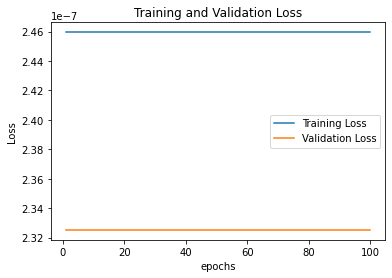

In [30]:
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 700)               7000700   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               280400    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,289,141
Trainable params: 7,289,141
Non-trainable params: 0
_________________________________________________________________


In [32]:
network.evaluate(X_test, Y_test)

41/41 [==============================] - 1s 16ms/step - loss: 2.3741e-07 - accuracy: 0.1912


[2.3740754784284945e-07, 0.19121047854423523]